
# <center>Проведение исследования по выявлению закономерностей, определяющих успешность игры<center>

**Цель исследования:** *Выявить определяющие успешность игры закономерности для определения потенциально популярных продуктов и планирования рекламной кампании.*
    
**Исходные данные:** Исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанрах и платформах. Данные до 2016 года, за 2016 год не полные.

**Ход исследования:**
- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Составляем портрет пользователя каждого региона
- Проверяем гипотезы
- Общий вывод

**Проверяемые гипотезы:**
- *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*
- *Средние пользовательские рейтинги жанров Action и Sports разные.*

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats as st

In [3]:
df.sample(4)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14930,X3: Terran Conflict,PC,2008.0,Simulation,0.00,0.02,0.0,0.00,73.0,7.9,T
15691,Thomas & Friends: Hero of the Rails,Wii,2010.0,Misc,0.00,0.01,0.0,0.00,NaN,NaN,NaN
9137,Eternal Poison,PS2,2008.0,Role-Playing,0.07,0.05,0.0,0.02,65.0,8.2,T
8123,American Chopper 2: Full Throttle,PS2,2005.0,Racing,0.09,0.07,0.0,0.02,NaN,8.1,T


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### ВЫВОД

<div style="border:solid green 3px; padding: 30px">

В таблице 11 столбцов, 16715 строк. Тип данных object и float64.

В соответствии с документацией к данным: 
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB

Количество значений в столбцах разное, соответственно в данных присутствуют пропуски.

Количество продаж по регионам тяготеет к 0. Это может говорить о том, что огромное количество игры покупает очень маленькая аудитория
    
</div>

## Предобработка данных

Для предобратоки данных выделяем следующие задачи:
- [x] Приведение в соответствие название колонок
- [x] Работа с пропусками
- [x] Проверка столбцов на наличие неявных дубликатов 
- [x] Изменение типов данных 
- [x] Проверка на наличие полных дубликатов

<div style="border:solid green 3px; padding: 30px">
    
### ВЫВОД
    
В данном блоке были проделанны следюущие действия:  
   - Изменение названия колонок
   - Обработка пропусков
   - Изменение формата данных
   - Изменение значений
    
В столбцах `name`, `year_of_release`, `genre` не заполненны менее 2% ячеек. Больше всего данных не хватает в стобцах `critic_score`, `user_score` и `rating`. В них не хватает от 40 до 51% процента. Проблема большого количества пропусков, скорее всего, связана с техническими проблемами, при получении данных из открытых источников
</div>

## Исследовательский анализ данных

### Количество выпускаемых игр в разрезе годов

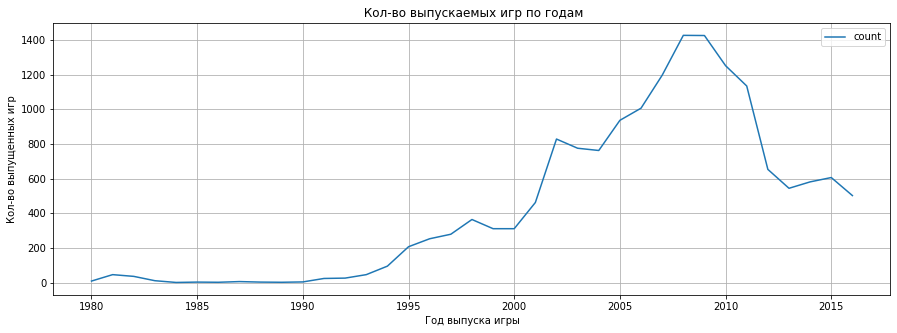

In [69]:
(
    df
    .groupby('year_of_release')['name'].count()
    .reset_index(name='count')
    .plot(
        x='year_of_release', 
        y='count',
        xlabel='Год выпуска игры',
        ylabel='Кол-во выпущенных игр',
        figsize=(15, 5),
        grid=True,
        title=' Кол-во выпускаемых игр по годам'
    )
);

#### Вывод

Начиная с 1989 года, имелась тенденция увеличения количества выпускаемых игр. Пиковым является 2008 год с 997 выпущенными играми. Начиная с 2009 года начинается спад выпуска игр, который возможно начинает прерываться с 2015 года.

### Изменение продаж в зависимости от платформы

#### Добавим столбец с общим количеством продаж

In [70]:
df['total_sales'] = (
    df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])

####  Рейтинг платформ по продажам

In [71]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.32
X360     961.24
PS3      931.34
Wii      890.52
DS       802.13
PS       725.67
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       253.22
XB       249.61
N64      218.01
SNES     200.04
GC       196.62
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
Name: total_sales, dtype: float64

####  6 платформ с самым большим количесвом продаж

In [72]:
platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index

df_platform = (
    df[df['platform'].isin(platforms)]
    .groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
)

In [73]:
df_platform.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.32
X360     961.24
PS3      931.34
Wii      890.52
DS       802.13
PS       725.67
Name: total_sales, dtype: float64

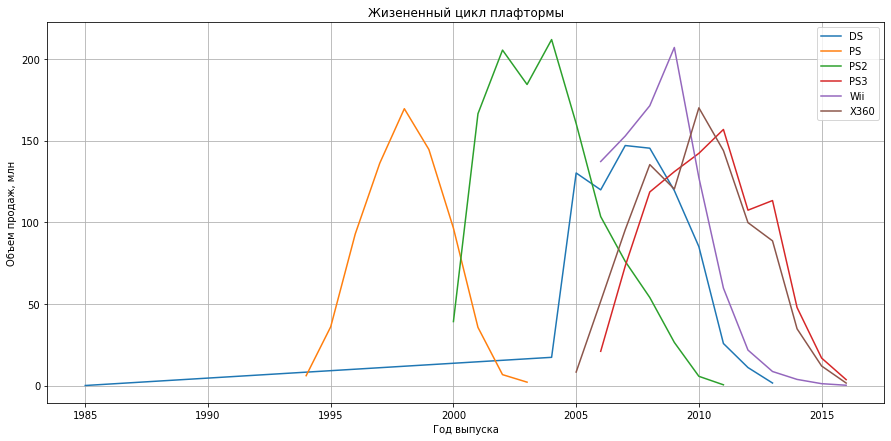

In [74]:
plt.figure(figsize=(15, 7))
for platform, group_data in df_platform.groupby('platform'):
    plt.plot(group_data['year_of_release'], group_data['total_sales'], label=platform)
    plt.title("Жизененный цикл плафтормы")
    plt.xlabel('Год выпуска')
    plt.ylabel('Объем продаж, млн')
    plt.grid(True)
    plt.legend();
plt.show()

#### Вывод

На основании графиков можем предположить, что:
- Жизненный цикл платформы равен от 8 до 11 лет
- Период роста занимает от 3 до 5 лет
- Период спада занимает от 5 до 7 лет
- Большинство платформ с большим количеством продаж появилось с 2005 и к текущему моменту они приблизились к своему закату

### Определение актуального периода

Актуальный период можем определить на основании того факта, что период роста платформы занимает около от 3 до 5 лет.Так как индустрии разработки компьютерных игр динамичная, то возьмем период за 3 года. Данные за 2016 год не берем (Не понятно за какой период данные)

In [75]:
work_df = df.query('year_of_release >= 2013 and year_of_release < 2016')

### Потенциально прибыльные платформы

In [76]:
work_df_platform = work_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

In [77]:
work_df_platform.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.11
WiiU     60.03
PC       34.18
PSV      28.74
Wii      13.48
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [78]:
top_platforms = (
    work_df_platform
    .groupby('platform')['total_sales'].sum()
    .sort_values(ascending=False)
    .head(7)
    .index
)

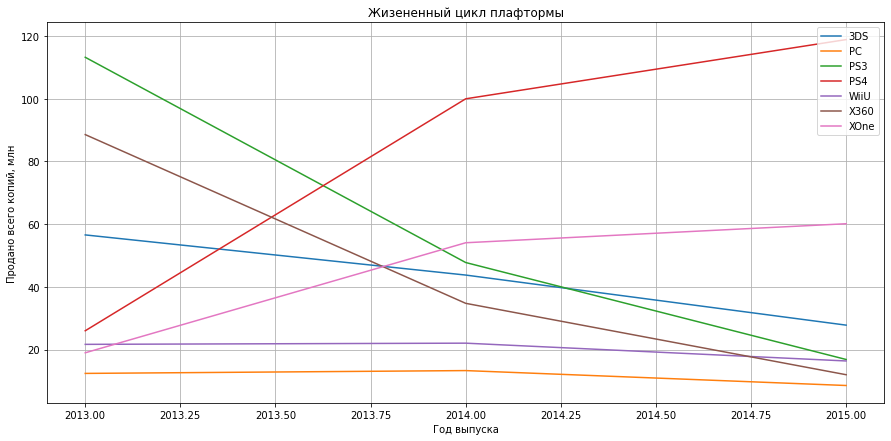

In [79]:
plt.figure(figsize=(15, 7))
for platform, group_data in work_df_platform.query('platform in @top_platforms').groupby('platform'):
    plt.plot(group_data['year_of_release'], group_data['total_sales'], label=platform)
    plt.get_cmap('viridis', 12)
    plt.title("Жизененный цикл плафтормы")                                    
    plt.xlabel('Год выпуска')
    plt.ylabel('Продано всего копий, млн')
    plt.grid(True)
    plt.legend();
plt.show()

#### Вывод

Проанализировав семь платформ лидирующих по объемам продаж, можем сделать следующие выводы:
- **XOne и PS4** являются растущими и потенциально прибыльными платформами для выпуска игр;
- Остальные платформы подходят к своему закату.

### Глобальные продажи игр в разбивке по платформам

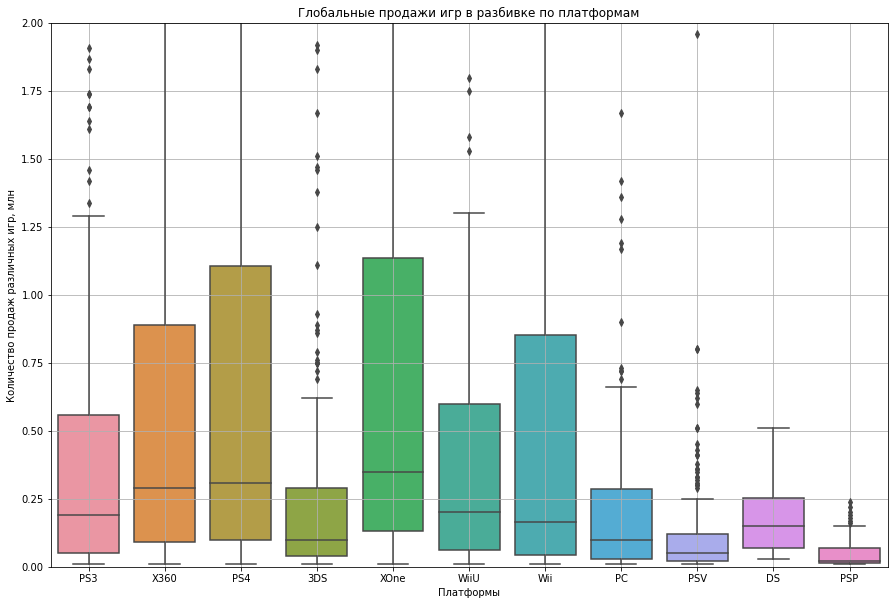

In [80]:
plt.figure(figsize = ([15,10]))
ax = sns.boxplot(data=work_df, x='platform', y='total_sales')
ax.set_ylim([0,2])
ax.set_ylabel('Количество продаж различных игр, млн')
ax.set_xlabel('Платформы')
ax.set_title('Глобальные продажи игр в разбивке по платформам')
ax.grid();

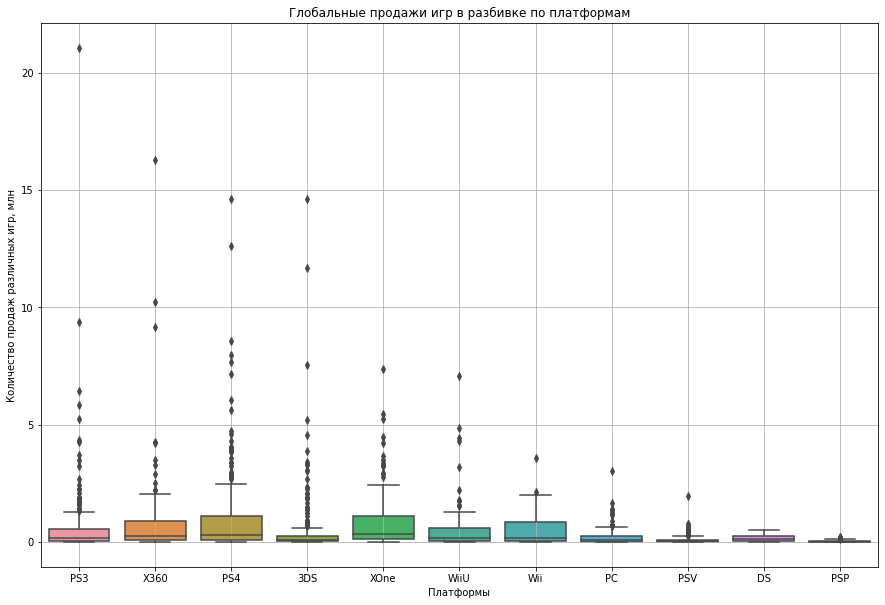

In [81]:
plt.figure(figsize = ([15,10]))
ax = sns.boxplot(data=work_df, x='platform', y='total_sales')
ax.set_ylabel('Количество продаж различных игр, млн')
ax.set_xlabel('Платформы')
ax.set_title('Глобальные продажи игр в разбивке по платформам')
ax.grid();

#### Вывод

На основании представленных выше диаграмм, можем сделать вывод, что на платформе PS4 наибольшее количество выбросов и на данной платформе они сильнее отличаются. Это может говорить о том, что на данной платформе чаще появляются неординарные игры, которые лучше продаются, чем общая масса игр.

### Влияние отзывов пользователей и критиков на продажи на самой популярной платформе

**Для исследования возьмем платформу PS4**

#### Оценка корреляции между объемом продаж и оценкой критиков на платформе PS4

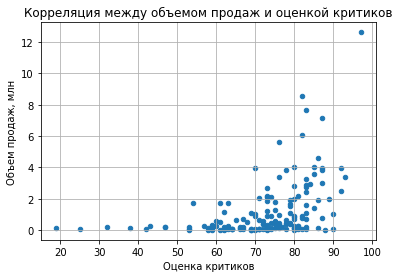

In [82]:
(
    work_df
    .query('platform == "PS4" and critic_score >= 0')
    .plot(
        x='critic_score',
        y='total_sales',
        xlabel='Оценка критиков',
        ylabel='Объем продаж, млн',
        kind='scatter',
        grid=True,
        title='Корреляция между объемом продаж и оценкой критиков')
);

In [83]:
work_df.query('platform == "PS4" and critic_score >= 0')['critic_score'].corr(
    work_df.query('platform == "PS4" and critic_score >= 0')['total_sales'])

0.4318482049982003

#### Вывод

Корреляция между объемом продаж и оценкой критиков похожа на экспоненциальную, сила корелляции слабая в рамках платформы PS4

#### Оценка корреляции между объемом продаж и оценкой пользователей

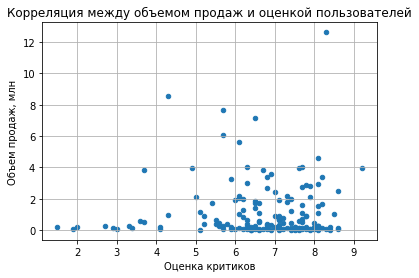

In [84]:
(
    work_df
    .query('platform == "PS4" and user_score >= 0')
    .plot(
        x='user_score',
        y='total_sales',
        xlabel='Оценка критиков',
        ylabel='Объем продаж, млн',
        kind='scatter',
        grid=True,
        title='Корреляция между объемом продаж и оценкой пользователей')
);

In [85]:
work_df.query('platform == "PS4" and user_score >= 0')['user_score'].corr(
    work_df.query('platform == "PS4" and user_score >= 0')['total_sales'])

0.024230832360622533

#### Вывод

Корреляция между объемом продаж и оценкой пользователей в рамках платформы PS4 можно сказать, что отсутствует

### Влияние оценок пользователей и критиков на продажи на разных платформах

Для данного исследования возьмем топ 7 платформ по количеству продаж

#### Влияние оценки критиков на продажи на разных платформах

Коэффициент Пирсона для платформы PS4 составляет 0.4318482049982003, сила корреляции слабая
Коэффициент Пирсона для платформы PS3 составляет 0.33428533933719196, сила корреляции слабая
Коэффициент Пирсона для платформы X360 составляет 0.3503445460228666, сила корреляции слабая
Коэффициент Пирсона для платформы XOne составляет 0.4593845680707108, сила корреляции слабая
Коэффициент Пирсона для платформы 3DS составляет 0.38432600457452243, сила корреляции слабая
Коэффициент Пирсона для платформы WiiU составляет 0.3839512824903963, сила корреляции слабая
Коэффициент Пирсона для платформы PC составляет 0.2164032074613741, сила корреляции слабая


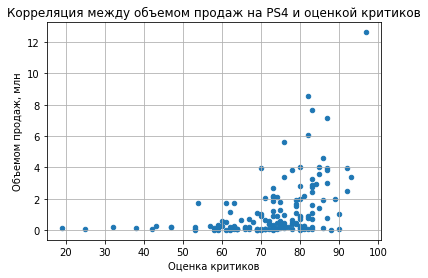

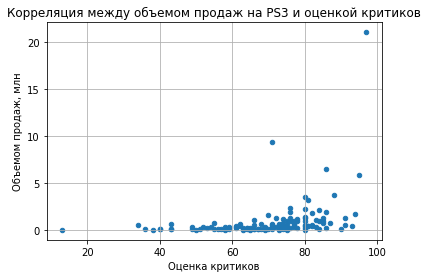

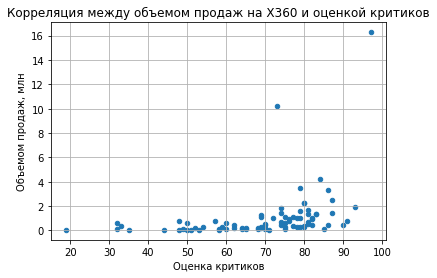

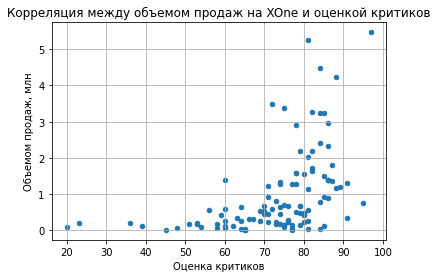

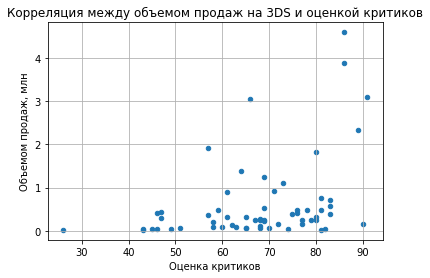

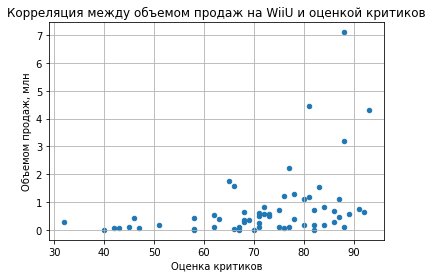

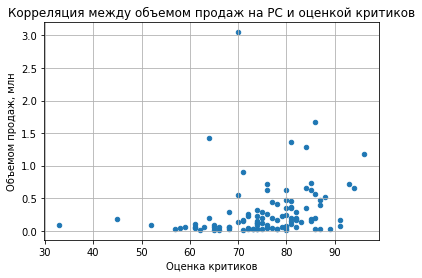

In [86]:
for platform in top_platforms:
    corr = (
        work_df
        .query('platform == @platform and critic_score >= 0')['critic_score']
        .corr(work_df
        .query('platform == @platform and critic_score >= 0')['total_sales'])
    )
    (
        work_df
        .query('platform == @platform and critic_score >= 0')
        .plot(
            x='critic_score',
            y='total_sales',
            xlabel='Оценка критиков',
            ylabel='Объемом продаж, млн',
            kind='scatter',
            grid=True,
            title=f'Корреляция между объемом продаж на {platform} и оценкой критиков'
        ) 
    )
    if corr <= 0.2:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции очень слабая')
    elif 0.5 >= corr > 0.2:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции слабая')
    elif 0.7 >= corr > 0.5:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции средняя')
    elif 0.9 >= corr > 0.7:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции высокая')
    elif corr > 0.9:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции очень высокая')

**ВЫВОД**

Корреляция между объемом продаж и оценкой критиков чаще бывает приближенной к  экспоненциальной. Самая сильная корреляция у платформы XOne, самая слабая у платформы PC

#### Влияние оценки пользователей на продажи на разных платформах

Коэффициент Пирсона для платформы PS4 составляет 0.024230832360622533, сила корреляции очень слабая
Коэффициент Пирсона для платформы PS3 составляет -0.016332728343513424, сила корреляции очень слабая
Коэффициент Пирсона для платформы X360 составляет -0.03456245410023829, сила корреляции очень слабая
Коэффициент Пирсона для платформы XOne составляет -0.039268285445522, сила корреляции очень слабая
Коэффициент Пирсона для платформы 3DS составляет 0.26471120670292764, сила корреляции слабая
Коэффициент Пирсона для платформы WiiU составляет 0.433476211473693, сила корреляции слабая
Коэффициент Пирсона для платформы PC составляет -0.12942822535329046, сила корреляции очень слабая


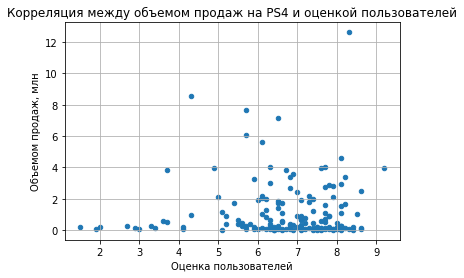

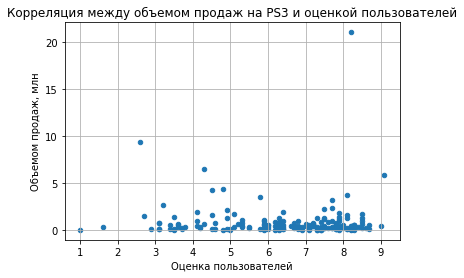

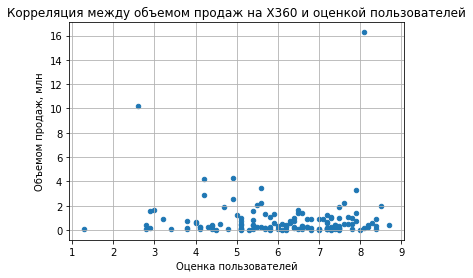

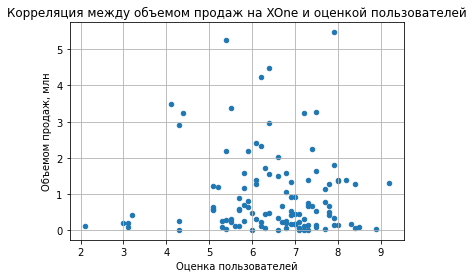

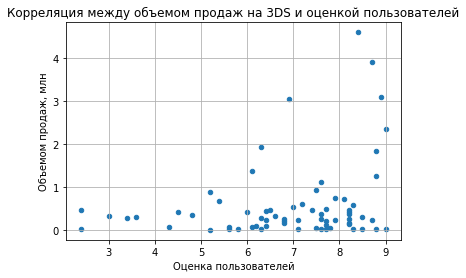

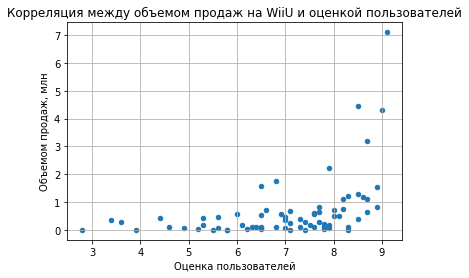

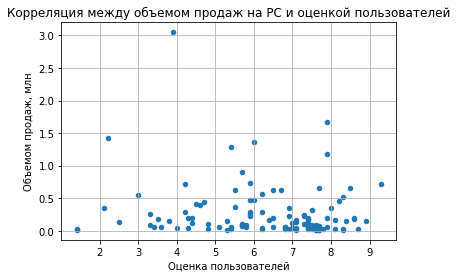

In [87]:
for platform in top_platforms:
    corr = (
        work_df
        .query('platform == @platform and user_score > 0')['user_score']
        .corr(work_df
        .query('platform == @platform and user_score > 0')['total_sales'])
    )
    (
        work_df
        .query('platform == @platform and user_score > 0')
        .plot(
            x='user_score',
            y='total_sales',
            xlabel='Оценка пользователей',
            ylabel='Объемом продаж, млн',
            kind='scatter',
            grid=True,
            title=f'Корреляция между объемом продаж на {platform} и оценкой пользователей'
        ) 
    )
    if corr <= 0.2:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции очень слабая')
    elif 0.5 >= corr > 0.2:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции слабая')
    elif 0.7 >= corr > 0.5:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции средняя')
    elif 0.9 >= corr > 0.7:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции высокая')
    elif corr > 0.9:
        print(f'Коэффициент Пирсона для платформы {platform} составляет {corr}, сила корреляции очень высокая')


**ВЫВОД**

Корреляция между объемом продаж и оценкой пользователей колеблется от очень слабой до слабой. Самая сильная корреляция у платформы WiiU, самая слабая у платформы PS3

### Распределение игр по жанрам

In [88]:
genre_sales = work_df.groupby('genre')['total_sales'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)

In [89]:
genre_sales['sales_per_game_mln'] = genre_sales['sum'] / genre_sales['count'] 

In [90]:
genre_sales.columns = ['total_sales_mln', 'games_count', 'sales_per_game_mln']

In [91]:
genre_sales

,total_sales_mln,games_count,sales_per_game_mln
genre,,,
Action,291.76,588,0.496190
Shooter,194.76,140,1.391143
Role-Playing,127.71,238,0.536597
Sports,127.16,166,0.766024
Misc,60.22,123,0.489593
Platform,39.40,59,0.667797
Racing,37.10,61,0.608197
Fighting,30.84,64,0.481875
Simulation,19.87,44,0.451591


**ВЫВОД**

- Больше всего игр выпускается в жанрах - Action, Role-Playing и Adventure
- Лучшие жанры по объему продаж:
    - Action - 292 миллиона продаж
    - Shooter - 195 миллионов продаж
- Лучшие жанры по объему продаж на одну игру:
    - Shooter - 1,39 миллиона продаж
    - Sports - 0,77 миллионов продаж
- Action (самые высокие объемы продаж) и Puzzle (самые низкие объемы продаж), они отличаются почти в 92 раза

<div style="border:solid green 3px; padding: 30px">

### ВЫВОД

</div>

- Начиная с 1989 года, имелась тенденция увеличения количества выпускаемых игр;
- Пиковым является 2008 год с 997 выпущенными играми;
- Начиная с 2009 года начинается спад выпуска игр, который возможно начинает прерываться с 2015 года;
- Жизненный цикл платформы равен от 8 до 11 лет;
- Период роста занимает от 3 до 5 лет;
- Период спада занимает от 5 до 7 лет;
- Большинство платформ с большим количеством продаж появилось с 2005 и к текущему моменту они приблизились к своему закату;
- XOne и PS4 являются растущими и потенциально прибыльными платформами для выпуска игр;
- Остальные платформы подходят к своему закату;
- На платформе PS4 наибольшее количество выбросов и на данной платформе они сильнее отличаются;
- Корреляция между объемом продаж и оценкой критиков чаще бывает приближенной к  экспоненциальной. Самая сильная корреляция у платформы XOne, самая слабая у платформы PC;
- Корреляция между объемом продаж и оценкой пользователей колеблется от очень слабой до слабой. Самая сильная корреляция у платформы WiiU, самая слабая у платформы PS3;
- Больше всего игр выпускается в жанрах - Action, Role-Playing и Adventure
- Лучшие жанры по объему продаж:
    - Action - 292 миллиона продаж
    - Shooter - 195 миллионов продаж
- Лучшие жанры по объему продаж на одну игру:
    - Shooter - 1,39 миллиона продаж
    - Sports - 0,77 миллионов продаж
- Action (самые высокие объемы продаж) и Puzzle (самые низкие объемы продаж), они отличаются почти в 92 раза.

## Портрет пользователей каждого региона

### Портрет пользователя из региона NA

Посчитаем топ 5 результатов и засуммируем оставшиеся в отдельную группу

In [92]:
na_user_platform = work_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()

In [93]:
na_user_platform_f = na_user_platform[:5].copy()

others = pd.DataFrame(data = {
    'platform' : ['Other platform'],
    'na_sales' : [na_user_platform['na_sales'][5:].sum()]
})

na_user_platform_f = pd.concat([na_user_platform_f, others]).reset_index(drop=True)

In [94]:
na_user_platform_f

,platform,na_sales
0,PS4,87.25
1,X360,80.97
2,XOne,78.85
3,PS3,62.83
4,3DS,34.06
5,Other platform,48.82


In [95]:
na_user_genre = work_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()

In [96]:
na_user_genre_f = na_user_genre[:5].copy()

others = pd.DataFrame(data = {
    'genre' : ['Other genre'],
    'na_sales' : [na_user_genre['na_sales'][5:].sum()]
})

na_user_genre_f = pd.concat([na_user_genre_f, others]).reset_index(drop=True)

In [97]:
na_user_genre_f

,genre,na_sales
0,Action,116.76
1,Shooter,93.50
2,Sports,57.73
3,Role-Playing,40.51
4,Misc,26.73
5,Other genre,57.55


In [98]:
na_user_rating = work_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index(name='na_sales')

In [99]:
na_user_rating

,rating,na_sales
0,M,149.54
1,No rating,80.89
2,E,71.08
3,E10+,50.43
4,T,40.84


**ВЫВОД**

По пользователям из региона NA можно сделать следующие выводы:
- Две самые популярные платформы: PS4, X360, XOne;
- Самые популярные жанры Action и Shooter;
- Чаще всего продаются игры с рейтингом M

### Портрет пользователя из региона EU

In [100]:
eu_user_platform = work_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()

In [101]:
eu_user_platform_f = eu_user_platform[:5].copy()

others = pd.DataFrame(data = {
    'platform' : ['Other platform'],
    'eu_sales' : [eu_user_platform['eu_sales'][5:].sum()]
})

eu_user_platform_f = pd.concat([eu_user_platform_f, others]).reset_index(drop=True)

In [102]:
eu_user_platform_f

,platform,eu_sales
0,PS4,109.31
1,PS3,66.55
2,XOne,41.96
3,X360,41.81
4,3DS,28.63
5,Other platform,52.75


In [103]:
eu_user_genre = work_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()

In [104]:
eu_user_genre_f = eu_user_genre[:5].copy()

others = pd.DataFrame(data = {
    'genre' : ['Other genre'],
    'eu_sales' : [eu_user_genre['eu_sales'][5:].sum()]
})

eu_user_genre_f = pd.concat([eu_user_genre_f, others]).reset_index(drop=True)

In [105]:
eu_user_genre_f

,genre,eu_sales
0,Action,107.45
1,Shooter,71.96
2,Sports,48.51
3,Role-Playing,32.69
4,Misc,19.38
5,Other genre,61.02


In [106]:
eu_user_rating = work_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index(name='eu_sales')

In [107]:
eu_user_rating

,rating,eu_sales
0,M,128.78
1,No rating,71.44
2,E,69.75
3,E10+,38.88
4,T,32.16


**ВЫВОД**

По пользователям из региона EU можно сделать следующие выводы:
- Самая популярная платформа PS4
- Самый популярный жанр Action и Shooter
- Чаще всего продаются игры с рейтингом M

### Портрет пользователя из региона JP

In [108]:
jp_user_platform = work_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

In [109]:
jp_user_platform_f = jp_user_platform[:5].copy()

others = pd.DataFrame(data = {
    'platform' : ['Other platform'],
    'jp_sales' : [jp_user_platform['jp_sales'][5:].sum()]
})

jp_user_platform_f = pd.concat([jp_user_platform_f, others]).reset_index(drop=True)

In [110]:
jp_user_platform_f

,platform,jp_sales
0,3DS,59.78
1,PS3,22.05
2,PSV,15.03
3,PS4,10.22
4,WiiU,10.21
5,Other platform,4.18


In [111]:
jp_user_genre = work_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()

In [112]:
jp_user_genre_f = jp_user_genre[:5].copy()

others = pd.DataFrame(data = {
    'genre' : ['Other genre'],
    'jp_sales' : [jp_user_genre['jp_sales'][5:].sum()]
})

jp_user_genre_f = pd.concat([jp_user_genre_f, others]).reset_index(drop=True)

In [113]:
jp_user_genre_f

,genre,jp_sales
0,Role-Playing,44.43
1,Action,33.42
2,Misc,8.16
3,Fighting,6.90
4,Shooter,5.55
5,Other genre,23.01


In [114]:
jp_user_rating = work_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index(name='jp_sales')

In [115]:
jp_user_rating

,rating,jp_sales
0,No rating,70.73
1,T,18.32
2,E,14.07
3,M,12.91
4,E10+,5.44


**ВЫВОД**


По пользователям из региона JP можно сделать следующие выводы:
- Самая популярная платформа 3DS
- Самые популярные жанры Role-Playing и Action
- Чаще всего продаются игры без проставленного рейтинга ESRB

### ВЫВОД



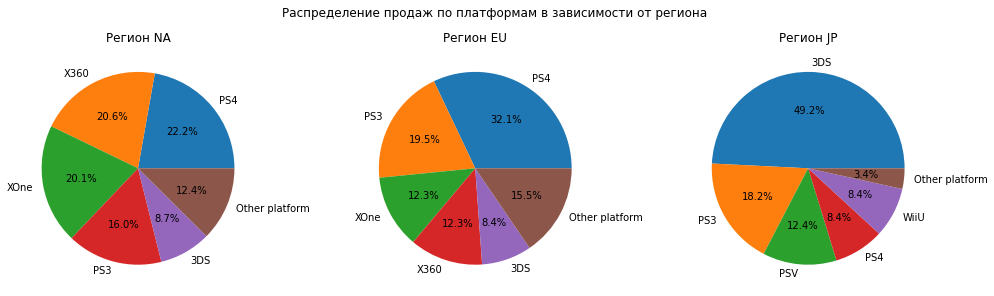

In [116]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 4), constrained_layout=True)
axs[0].pie(na_user_platform_f['na_sales'], labels=na_user_platform_f['platform'],  autopct='%1.1f%%')
axs[0].set_title('Регион NA')
axs[1].pie(eu_user_platform_f['eu_sales'], labels=eu_user_platform_f['platform'],  autopct='%1.1f%%')
axs[1].set_title('Регион EU')
axs[2].pie(jp_user_platform_f['jp_sales'], labels=jp_user_platform_f['platform'],  autopct='%1.1f%%')
axs[2].set_title('Регион JP')
fig.suptitle('Распределение продаж по платформам в зависимости от региона');

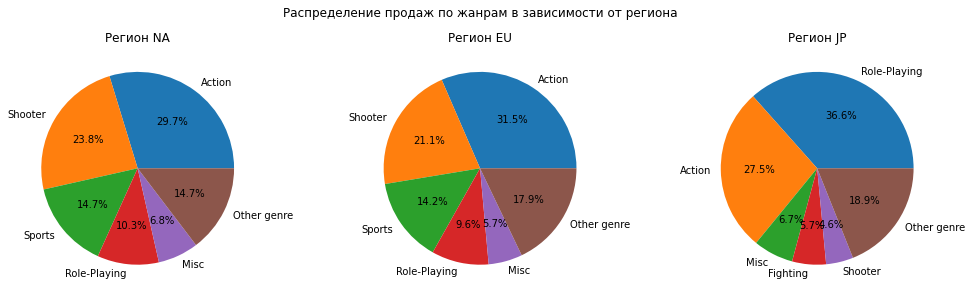

In [117]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 4), constrained_layout=True)
axs[0].pie(na_user_genre_f['na_sales'], labels=na_user_genre_f['genre'],  autopct='%1.1f%%')
axs[0].set_title('Регион NA')
axs[1].pie(eu_user_genre_f['eu_sales'], labels=eu_user_genre_f['genre'],  autopct='%1.1f%%')
axs[1].set_title('Регион EU')
axs[2].pie(jp_user_genre_f['jp_sales'], labels=jp_user_genre_f['genre'],  autopct='%1.1f%%')
axs[2].set_title('Регион JP')
fig.suptitle('Распределение продаж по жанрам в зависимости от региона');

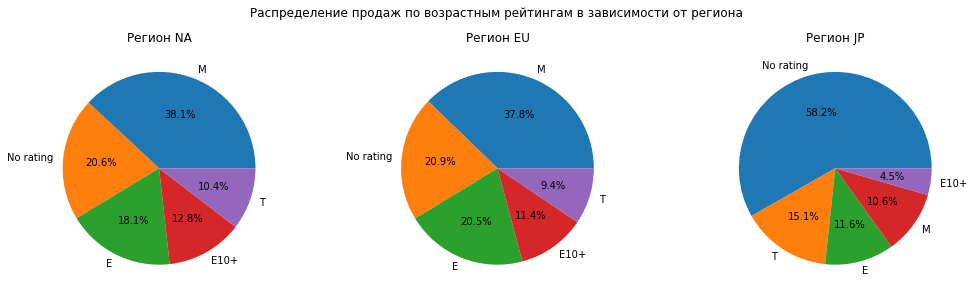

In [118]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 4), constrained_layout=True)
axs[0].pie(na_user_rating['na_sales'], labels=na_user_rating['rating'],  autopct='%1.1f%%')
axs[0].set_title('Регион NA')
axs[1].pie(eu_user_rating['eu_sales'], labels=eu_user_rating['rating'],  autopct='%1.1f%%')
axs[1].set_title('Регион EU')
axs[2].pie(jp_user_rating['jp_sales'], labels=jp_user_rating['rating'],  autopct='%1.1f%%')
axs[2].set_title('Регион JP')
fig.suptitle('Распределение продаж по возрастным рейтингам в зависимости от региона');

<div style="border:solid green 3px; padding: 30px">
    
- Пользователи с региона EU и NA сильно похожи, имеют небольшие отличия.
- Пользователи из региона JP сильно отличаются по своим предпочтениям, как по платформам, так и по возрастному рейтингу ESRB.
- Жанр Action оказался очень популярным во всех регионах
    
</div>

## Проверка гипотез

### Гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

(При формирование альтернативной гипотезы и исходили из того, что каких-либо данных о разлчие рейтингов на разных плотформах нет)

In [119]:
user_score_xbox = work_df.query('platform == "XOne" and user_score >= 0')['user_score']

In [120]:
user_score_xbox.describe()

count    116.000000
mean       6.477586
std        1.288213
min        2.100000
25%        5.775000
50%        6.700000
75%        7.300000
max        9.200000
Name: user_score, dtype: float64

In [121]:
user_score_pc = work_df.query('platform == "PC" and user_score >= 0')['user_score']

In [122]:
user_score_pc.describe()

count    110.000000
mean       6.258182
std        1.751193
min        1.400000
25%        5.325000
50%        6.750000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

**Выборка по размеру средняя, установим критический уровень статистической значимости равный 0.01**

In [123]:
alpha = .01

results = st.ttest_ind(user_score_xbox, user_score_pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


**ВЫВОД**

Представленные данные не противоречат выдвинутой гипотезе. Вероятность, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые состовляет приблизительно 72,4%

### Средние пользовательские рейтинги жанров Action и Sports разные
H0 - Средние пользовательские рейтинги жанров Action и Sports не равны

H1 - Средние пользовательские рейтинги жанра Sports и Action равны

In [124]:
user_score_action = work_df.query('genre == "Action" and user_score >= 0')['user_score']

In [125]:
user_score_action.count()

304

In [126]:
user_score_sports = work_df.query('genre == "Sports" and user_score >= 0')['user_score']

In [127]:
user_score_sports.count()

123

**Выборка по размеру средняя, установим критический уровень статистической значимости равный 0.01**

In [128]:
alpha = .01

results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

print('p-значение:', 1 - results.pvalue)

if 1 - results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


In [129]:
print(f'Средний пользовательский рейтинг в жанре Sport, составляет: {round(user_score_sports.mean(), 2)}')

Средний пользовательский рейтинг в жанре Sport, составляет: 5.18


In [130]:
print(f'Средний пользовательский рейтинг в жанре Action, составляет: {round(user_score_action.mean(), 2)}')

Средний пользовательский рейтинг в жанре Action, составляет: 6.89


**ВЫВОД**

Представленные данные не противоречат выдвинутой гипотезе. Вероятность, что средние пользовательские рейтинги жанра Action и Sports разные состовляет 100%

<div style="border:solid green 3px; padding: 30px">

### ВЫВОД    

    Данные не противоречат обеим выдвинутым гипотезам.
    
</div>

<div style="border:solid green 3px; padding: 30px">

## ОБЩИЙ ВЫВОД
    
При предобработке данных была выявлена проблема большого количества пропусков в столбцах `critic_score`, `user_score` и `rating`. В них не хватает от 40 до 51% процента. Проблема большого количества пропусков, скорее всего, связана с техническими проблемами, при получении данных из открытых источников.
    
- Начиная с 1989 года, имелась тенденция увеличения количества выпускаемых игр;
- Пиковым является 2008 год с 997 выпущенными играми;
- Начиная с 2009 года начинается спад выпуска игр, который возможно начинает прерываться с 2015 года;
- Жизненный цикл платформы равен от 8 до 11 лет;
- Период роста занимает от 3 до 5 лет;
- Период спада занимает от 5 до 7 лет;
- Большинство платформ с большим количеством продаж появилось с 2005 и к текущему моменту они приблизились к своему закату;
- XOne и PS4 являются растущими и потенциально прибыльными платформами для выпуска игр;
- Остальные платформы подходят к своему закату;
- На платформе PS4 наибольшее количество выбросов и на данной платформе они сильнее отличаются;
- Корреляция между объемом продаж и оценкой критиков чаще бывает приближенной к  экспоненциальной. Самая сильная корреляция у платформы XOne, самая слабая у платформы PC;
- Корреляция между объемом продаж и оценкой пользователей колеблется от очень слабой до слабой. Самая сильная корреляция у платформы WiiU, самая слабая у платформы PS3;
- Больше всего игр выпускается в жанрах - Action, Role-Playing и Adventure
- Лучшие жанры по объему продаж:
    - Action - 292 миллиона продаж
    - Shooter - 195 миллионов продаж
- Лучшие жанры по объему продаж на одну игру:
    - Shooter - 1,39 миллиона продаж
    - Sports - 0,77 миллионов продаж
- Action (самые высокие объемы продаж) и Puzzle (самые низкие объемы продаж), они отличаются почти в 92 раза.
    
    Пользователи с региона EU и NA сильно похожи, имеют небольшие отличия. Пользователи из региона JP сильно отличаются по своим предпочтениям, как по платформам, так и по возрастному рейтингу.
    
    Обе гипотезы данного ислледования небыли опровергнуты.
</div>

<div style="border:solid green 3px; padding: 30px">

## РЕКОМЕНДАЦИИ
    
На основании данного исследования рекомендую:
- Платформы XOne и PS4
- Жанр Action наиболее объемный по продажам и входит в топ 2 жанров всех регионов
- Жанр Shooter входит в топ 2 жанров в регионах EU и NA
- Самый популярный возрастной рейтинг M  
- Регионы EU и NA сильно похожи, имеют одинаковые предпочтения в платформах, жанрах и возрастных рейтингах
- На оценку критиков стоит обращать внимание, в большую степень нежели обращать внимание на оценку пользователей
    
</div>